In [82]:
from physics.hstar import gghzz, c6
from physics.hzz import angles, zpair
from physics.simulation import msq

import numpy as np
import matplotlib.pyplot as plt

In [83]:
SAMPLE_DIR = '..'

In [84]:
sample = gghzz.Process(msq.Component.SIG, (0.1, SAMPLE_DIR + '/ggZZ2e2m_sig.csv', 100000))

In [85]:
z_chooser = zpair.ZPairChooser(bounds1=(70,115), bounds2=(70,115), algorithm='leastsquare')
l1_1, l2_1, l1_2, l2_2 = sample.events.filter(z_chooser)

kinematics = angles.calculate_2(l1_1, l2_1, l1_2, l2_2)

In [86]:
mod_c6 = c6.Modifier(baseline = msq.Component.SIG, c6_values = [-5,-1,0,1,5])
weights_c6, prob_c6 = mod_c6.modify(sample=sample, c6=[-10,10])

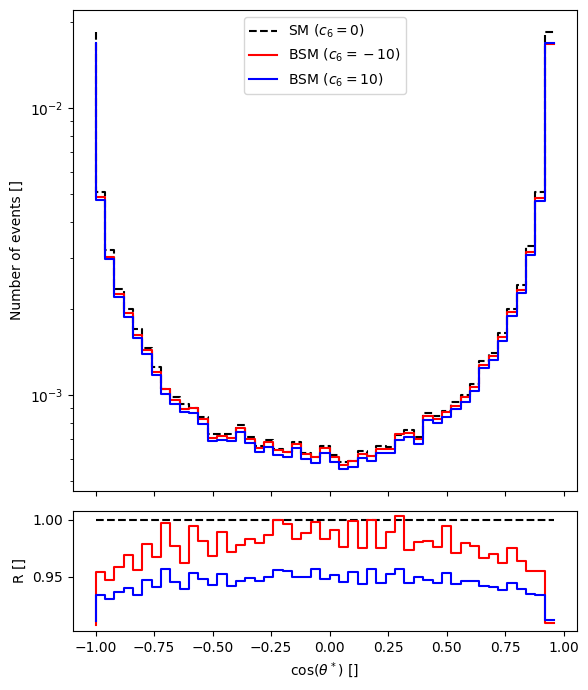

In [87]:
cth_str = kinematics[:,0]

BINS=50

hist_sm, bins = np.histogram(cth_str, bins=BINS, range=(-1,1), weights=sample[msq.Component.SIG].weights)
hist_c6_1, bins = np.histogram(cth_str, bins=BINS, range=(-1,1), weights=weights_c6.T[0])
hist_c6_2, bins = np.histogram(cth_str, bins=BINS, range=(-1,1), weights=weights_c6.T[1])

fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [4, 1]}, figsize=(6,7))

ax1.set_xticklabels([])

ax1.step(bins[:-1], hist_sm, color='k', linestyle='--', label=u'SM ($c_6=0$)')
ax1.step(bins[:-1], hist_c6_1, color='r', label=u'BSM ($c_6=-10$)')
ax1.step(bins[:-1], hist_c6_2, color='b', label=u'BSM ($c_6=10$)')

ax1.set_ylabel('Number of events []')
ax1.set_yscale('log')

ax1.legend()

ax2.step(bins[:-1], hist_sm/hist_sm, color='k', linestyle='--', label=u'SM ($c_6=0$)')
ax2.step(bins[:-1], hist_c6_1/hist_sm, color='r', label=u'BSM ($c_6=-10$)')
ax2.step(bins[:-1], hist_c6_2/hist_sm, color='b', label=u'BSM ($c_6=10$)')

ax2.set_xlabel(u'$\mathrm{cos}(\\theta^*)$ []')
ax2.set_ylabel('R []')
#ax2.set_ybound(0.99,1.02)

fig.tight_layout()

plt.show()

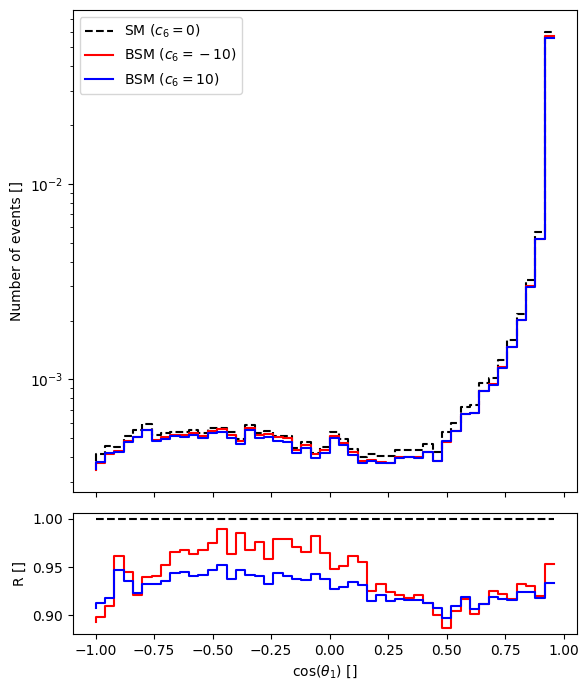

In [88]:
cth1 = kinematics[:,1]

BINS=50

hist_sm, bins = np.histogram(cth1, bins=BINS, range=(-1,1), weights=sample[msq.Component.SIG].weights)
hist_c6_1, bins = np.histogram(cth1, bins=BINS, range=(-1,1), weights=weights_c6.T[0])
hist_c6_2, bins = np.histogram(cth1, bins=BINS, range=(-1,1), weights=weights_c6.T[1])

fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [4, 1]}, figsize=(6,7))

ax1.set_xticklabels([])

ax1.step(bins[:-1], hist_sm, color='k', linestyle='--', label=u'SM ($c_6=0$)')
ax1.step(bins[:-1], hist_c6_1, color='r', label=u'BSM ($c_6=-10$)')
ax1.step(bins[:-1], hist_c6_2, color='b', label=u'BSM ($c_6=10$)')

ax1.set_ylabel('Number of events []')
ax1.set_yscale('log')

ax1.legend()

ax2.step(bins[:-1], hist_sm/hist_sm, color='k', linestyle='--', label=u'SM ($c_6=0$)')
ax2.step(bins[:-1], hist_c6_1/hist_sm, color='r', label=u'BSM ($c_6=-10$)')
ax2.step(bins[:-1], hist_c6_2/hist_sm, color='b', label=u'BSM ($c_6=10$)')

ax2.set_xlabel(u'$\mathrm{cos}(\\theta_1)$ []')
ax2.set_ylabel('R []')
#ax2.set_ybound(0.99,1.02)

fig.tight_layout()

plt.show()

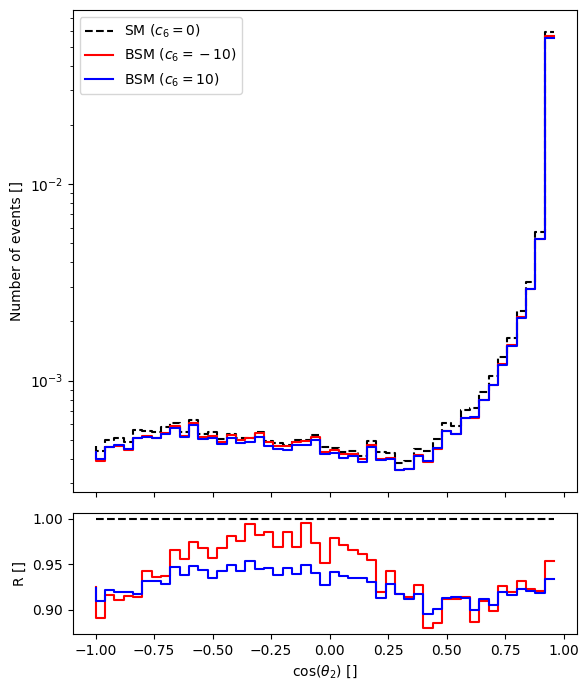

In [89]:
cth2 = kinematics[:,2]

BINS=50

hist_sm, bins = np.histogram(cth2, bins=BINS, range=(-1,1), weights=sample[msq.Component.SIG].weights)
hist_c6_1, bins = np.histogram(cth2, bins=BINS, range=(-1,1), weights=weights_c6.T[0])
hist_c6_2, bins = np.histogram(cth2, bins=BINS, range=(-1,1), weights=weights_c6.T[1])

fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [4, 1]}, figsize=(6,7))

ax1.set_xticklabels([])

ax1.step(bins[:-1], hist_sm, color='k', linestyle='--', label=u'SM ($c_6=0$)')
ax1.step(bins[:-1], hist_c6_1, color='r', label=u'BSM ($c_6=-10$)')
ax1.step(bins[:-1], hist_c6_2, color='b', label=u'BSM ($c_6=10$)')

ax1.set_ylabel('Number of events []')
ax1.set_yscale('log')

ax1.legend()

ax2.step(bins[:-1], hist_sm/hist_sm, color='k', linestyle='--', label=u'SM ($c_6=0$)')
ax2.step(bins[:-1], hist_c6_1/hist_sm, color='r', label=u'BSM ($c_6=-10$)')
ax2.step(bins[:-1], hist_c6_2/hist_sm, color='b', label=u'BSM ($c_6=10$)')

ax2.set_xlabel(u'$\mathrm{cos}(\\theta_2)$ []')
ax2.set_ylabel('R []')
#ax2.set_ybound(0.99,1.02)

fig.tight_layout()

plt.show()

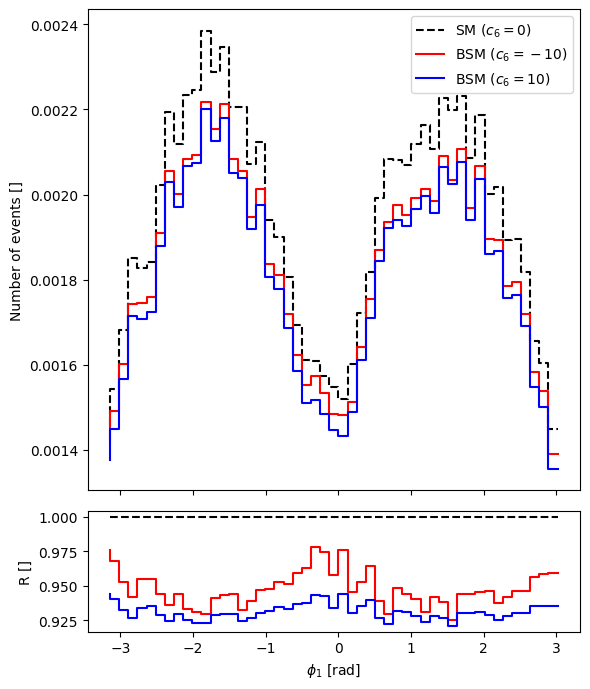

In [90]:
phi1 = kinematics[:,3]

BINS=50

hist_sm, bins = np.histogram(phi1, bins=BINS, range=(-np.pi,np.pi), weights=sample[msq.Component.SIG].weights)
hist_c6_1, bins1 = np.histogram(phi1, bins=BINS, range=(-np.pi,np.pi), weights=weights_c6.T[0])
hist_c6_2, bins2 = np.histogram(phi1, bins=BINS, range=(-np.pi,np.pi), weights=weights_c6.T[1])

fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [4, 1]}, figsize=(6,7))

ax1.set_xticklabels([])

ax1.step(bins[:-1], hist_sm, color='k', linestyle='--', label=u'SM ($c_6=0$)')
ax1.step(bins[:-1], hist_c6_1, color='r', label=u'BSM ($c_6=-10$)')
ax1.step(bins[:-1], hist_c6_2, color='b', label=u'BSM ($c_6=10$)')

ax1.set_ylabel('Number of events []')
#ax1.set_yscale('log')

ax1.legend()

ax2.step(bins[:-1], hist_sm/hist_sm, color='k', linestyle='--', label=u'SM ($c_6=0$)')
ax2.step(bins[:-1], hist_c6_1/hist_sm, color='r', label=u'BSM ($c_6=-10$)')
ax2.step(bins[:-1], hist_c6_2/hist_sm, color='b', label=u'BSM ($c_6=10$)')

ax2.set_xlabel(u'$\phi_1$ [rad]')
ax2.set_ylabel('R []')
#ax2.set_ybound(0.99,1.02)

fig.tight_layout()

plt.show()

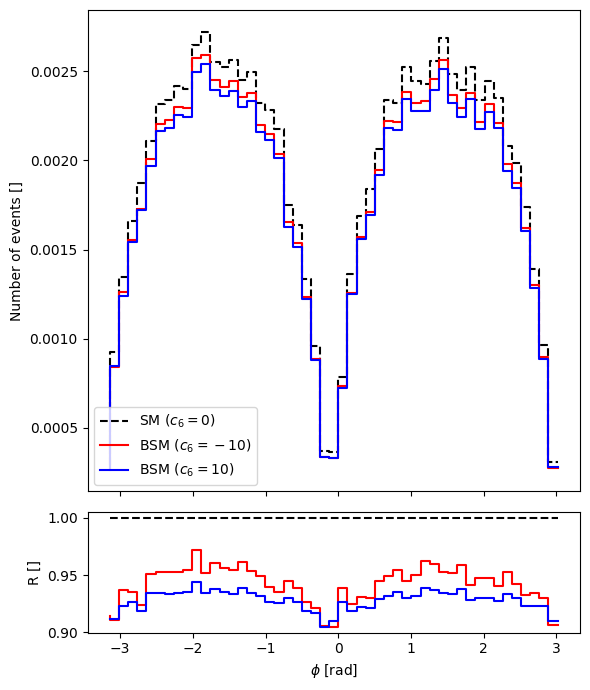

In [91]:
phi = kinematics[:,4]

BINS=50

hist_sm, bins = np.histogram(phi, bins=BINS, range=(-np.pi,np.pi), weights=sample[msq.Component.SIG].weights)
hist_c6_1, bins = np.histogram(phi, bins=BINS, range=(-np.pi,np.pi), weights=weights_c6.T[0])
hist_c6_2, bins = np.histogram(phi, bins=BINS, range=(-np.pi,np.pi), weights=weights_c6.T[1])

fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [4, 1]}, figsize=(6,7))

ax1.set_xticklabels([])

ax1.step(bins[:-1], hist_sm, color='k', linestyle='--', label=u'SM ($c_6=0$)')
ax1.step(bins[:-1], hist_c6_1, color='r', label=u'BSM ($c_6=-10$)')
ax1.step(bins[:-1], hist_c6_2, color='b', label=u'BSM ($c_6=10$)')

ax1.set_ylabel('Number of events []')
#ax1.set_yscale('log')

ax1.legend()

ax2.step(bins[:-1], hist_sm/hist_sm, color='k', linestyle='--', label=u'SM ($c_6=0$)')
ax2.step(bins[:-1], hist_c6_1/hist_sm, color='r', label=u'BSM ($c_6=-10$)')
ax2.step(bins[:-1], hist_c6_2/hist_sm, color='b', label=u'BSM ($c_6=10$)')

ax2.set_xlabel(u'$\phi$ [rad]')
ax2.set_ylabel('R []')
#ax2.set_ybound(0.99,1.02)

fig.tight_layout()

plt.show()

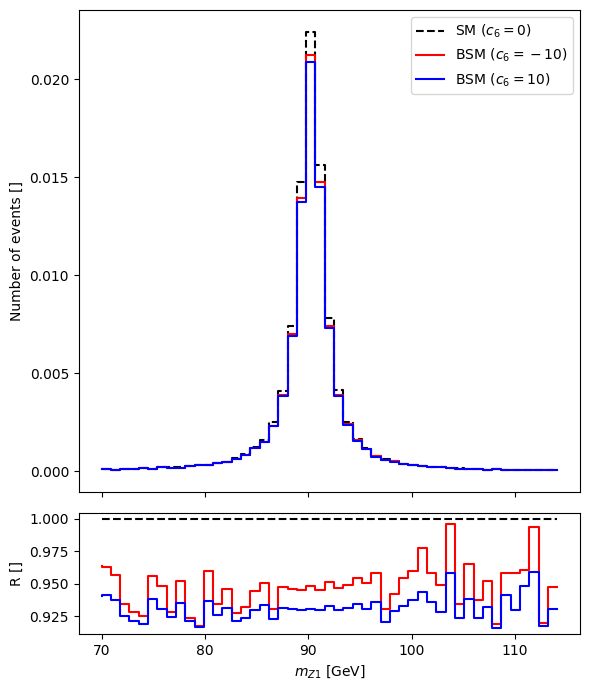

In [92]:
mZ1 = kinematics[:,5]

BINS=50

hist_sm, bins = np.histogram(mZ1, bins=BINS, range=(70,115), weights=sample[msq.Component.SIG].weights)
hist_c6_1, bins = np.histogram(mZ1, bins=BINS, range=(70,115), weights=weights_c6.T[0])
hist_c6_2, bins = np.histogram(mZ1, bins=BINS, range=(70,115), weights=weights_c6.T[1])

fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [4, 1]}, figsize=(6,7))

ax1.set_xticklabels([])

ax1.step(bins[:-1], hist_sm, color='k', linestyle='--', label=u'SM ($c_6=0$)')
ax1.step(bins[:-1], hist_c6_1, color='r', label=u'BSM ($c_6=-10$)')
ax1.step(bins[:-1], hist_c6_2, color='b', label=u'BSM ($c_6=10$)')

ax1.set_ylabel('Number of events []')
#ax1.set_yscale('log')

ax1.legend()

ax2.step(bins[:-1], hist_sm/hist_sm, color='k', linestyle='--', label=u'SM ($c_6=0$)')
ax2.step(bins[:-1], hist_c6_1/hist_sm, color='r', label=u'BSM ($c_6=-10$)')
ax2.step(bins[:-1], hist_c6_2/hist_sm, color='b', label=u'BSM ($c_6=10$)')

ax2.set_xlabel(u'$m_{Z1}$ [GeV]')
ax2.set_ylabel('R []')
#ax2.set_ybound(0.99,1.02)

fig.tight_layout()

plt.show()

In [93]:
print(np.sum((kinematics[:,6]<=50).astype(int)))
print(np.min(kinematics[:,6]))

0
70.00014158260387


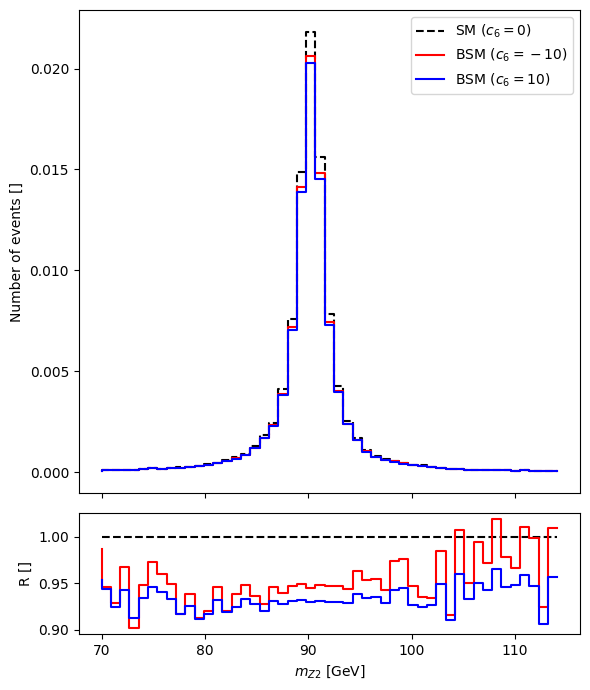

In [94]:
mZ2 = kinematics[:,6]

BINS=50

hist_sm, bins = np.histogram(mZ2, bins=BINS, range=(70,115), weights=sample[msq.Component.SIG].weights)
hist_c6_1, bins = np.histogram(mZ2, bins=BINS, range=(70,115), weights=weights_c6.T[0])
hist_c6_2, bins = np.histogram(mZ2, bins=BINS, range=(70,115), weights=weights_c6.T[1])

fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [4, 1]}, figsize=(6,7))

ax1.set_xticklabels([])

ax1.step(bins[:-1], hist_sm, color='k', linestyle='--', label=u'SM ($c_6=0$)')
ax1.step(bins[:-1], hist_c6_1, color='r', label=u'BSM ($c_6=-10$)')
ax1.step(bins[:-1], hist_c6_2, color='b', label=u'BSM ($c_6=10$)')

ax1.set_ylabel('Number of events []')
#ax1.set_yscale('log')

ax1.legend()

ax2.step(bins[:-1], hist_sm/hist_sm, color='k', linestyle='--', label=u'SM ($c_6=0$)')
ax2.step(bins[:-1], hist_c6_1/hist_sm, color='r', label=u'BSM ($c_6=-10$)')
ax2.step(bins[:-1], hist_c6_2/hist_sm, color='b', label=u'BSM ($c_6=10$)')

ax2.set_xlabel(u'$m_{Z2}$ [GeV]')
ax2.set_ylabel('R []')

fig.tight_layout()

plt.show()

/tmp/ipykernel_25370/1187430799.py:22: RuntimeWarning: invalid value encountered in divide
  ax2.step(bins[:-1], hist_sm/hist_sm, color='k', linestyle='--', label=u'SM ($c_6=0$)')
/tmp/ipykernel_25370/1187430799.py:23: RuntimeWarning: invalid value encountered in divide
  ax2.step(bins[:-1], hist_c6_1/hist_sm, color='r', label=u'BSM ($c_6=-10$)')
/tmp/ipykernel_25370/1187430799.py:24: RuntimeWarning: invalid value encountered in divide
  ax2.step(bins[:-1], hist_c6_2/hist_sm, color='b', label=u'BSM ($c_6=10$)')


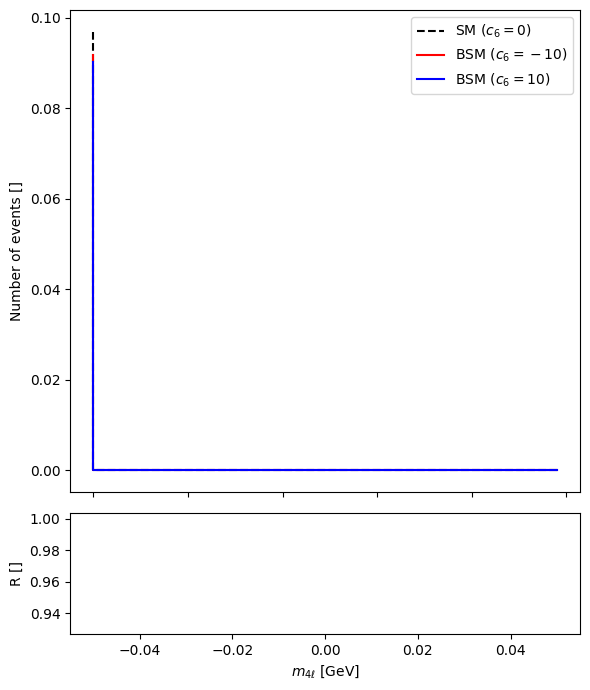

In [95]:
mZ2 = kinematics[:,7]

BINS=50

hist_sm, bins = np.histogram(mZ2, bins=BINS, range=(0,1000), weights=sample[msq.Component.SIG].weights)
hist_c6_1, bins = np.histogram(mZ2, bins=BINS, range=(0,1000), weights=weights_c6.T[0])
hist_c6_2, bins = np.histogram(mZ2, bins=BINS, range=(0,1000), weights=weights_c6.T[1])

fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [4, 1]}, figsize=(6,7))

ax1.set_xticklabels([])

ax1.step(bins[:-1], hist_sm, color='k', linestyle='--', label=u'SM ($c_6=0$)')
ax1.step(bins[:-1], hist_c6_1, color='r', label=u'BSM ($c_6=-10$)')
ax1.step(bins[:-1], hist_c6_2, color='b', label=u'BSM ($c_6=10$)')

ax1.set_ylabel('Number of events []')
#ax1.set_yscale('log')

ax1.legend()

ax2.step(bins[:-1], hist_sm/hist_sm, color='k', linestyle='--', label=u'SM ($c_6=0$)')
ax2.step(bins[:-1], hist_c6_1/hist_sm, color='r', label=u'BSM ($c_6=-10$)')
ax2.step(bins[:-1], hist_c6_2/hist_sm, color='b', label=u'BSM ($c_6=10$)')

ax2.set_xlabel(u'$m_{4\ell}$ [GeV]')
ax2.set_ylabel('R []')
#ax2.set_ybound(0.99,1.02)

fig.tight_layout()

plt.show()

0.005483221761098264


/tmp/ipykernel_25370/3547741101.py:24: RuntimeWarning: invalid value encountered in divide
  ax2.step(bins[:-1], hist_sm/hist_sm, color='k', linestyle='--', label=u'SM ($c_6=0$)')
/tmp/ipykernel_25370/3547741101.py:25: RuntimeWarning: invalid value encountered in divide
  ax2.step(bins[:-1], hist_c6_1/hist_sm, color='r', label=u'BSM ($c_6=-10$)')
/tmp/ipykernel_25370/3547741101.py:26: RuntimeWarning: invalid value encountered in divide
  ax2.step(bins[:-1], hist_c6_2/hist_sm, color='b', label=u'BSM ($c_6=10$)')


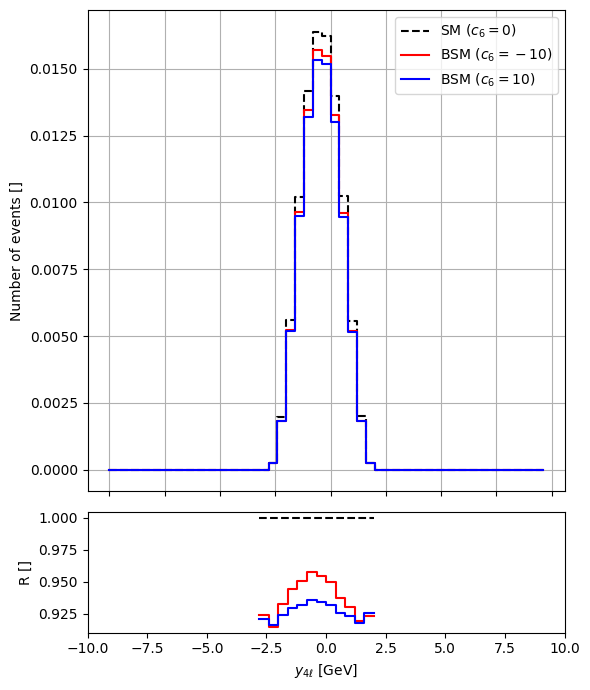

In [ ]:
mZ2 = kinematics[:,8]

print(np.mean(mZ2))

BINS=50

hist_sm, bins = np.histogram(mZ2, bins=BINS, range=(-10,10), weights=sample[msq.Component.SIG].weights)
hist_c6_1, bins = np.histogram(mZ2, bins=BINS, range=(-10,10), weights=weights_c6.T[0])
hist_c6_2, bins = np.histogram(mZ2, bins=BINS, range=(-10,10), weights=weights_c6.T[1])

fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [4, 1]}, figsize=(6,7))

ax1.set_xticklabels([])

ax1.step(bins[1:], hist_sm, color='k', linestyle='--', label=u'SM ($c_6=0$)')
ax1.step(bins[1:], hist_c6_1, color='r', label=u'BSM ($c_6=-10$)')
ax1.step(bins[1:], hist_c6_2, color='b', label=u'BSM ($c_6=10$)')

ax1.set_ylabel('Number of events []')
#ax1.set_yscale('log')
ax1.grid()
ax1.legend()

ax2.step(bins[1:], hist_sm/hist_sm, color='k', linestyle='--', label=u'SM ($c_6=0$)')
ax2.step(bins[1:], hist_c6_1/hist_sm, color='r', label=u'BSM ($c_6=-10$)')
ax2.step(bins[1:], hist_c6_2/hist_sm, color='b', label=u'BSM ($c_6=10$)')

ax2.set_xlabel(u'$y_{4\ell}$ [GeV]')
ax2.set_ylabel('R []')
ax2.set_xbound(-10,10)

fig.tight_layout()

plt.show()

In [97]:
import vector

pt_filter = angles.PTFilterPerLepton((20,None),(20,None),(20,None),(20,None))
sample.events.filter(pt_filter)

mod_c6 = c6.Modifier(baseline = msq.Component.SIG, c6_values = [-5,-1,0,1,5])
weights_c6, prob_c6 = mod_c6.modify(sample=sample, c6=[-10,10])

l1 = vector.array({'px': sample.events.kinematics['p3_px'], 'py': sample.events.kinematics['p3_py'], 'pz': sample.events.kinematics['p3_pz'], 'E': sample.events.kinematics['p3_E']})#negative l1
l2 = vector.array({'px': sample.events.kinematics['p4_px'], 'py': sample.events.kinematics['p4_py'], 'pz': sample.events.kinematics['p4_pz'], 'E': sample.events.kinematics['p4_E']})#positive l1
l3 = vector.array({'px': sample.events.kinematics['p5_px'], 'py': sample.events.kinematics['p5_py'], 'pz': sample.events.kinematics['p5_pz'], 'E': sample.events.kinematics['p5_E']})#negative l2
l4 = vector.array({'px': sample.events.kinematics['p6_px'], 'py': sample.events.kinematics['p6_py'], 'pz': sample.events.kinematics['p6_pz'], 'E': sample.events.kinematics['p6_E']})#positive l2

l1_by_pt = vector.array([l1, l2, l3, l4], dtype=[("px", float), ("py", float), ("pz", float), ("E", float)]).T[np.arange(l1.shape[0]), np.argsort(np.array([l1.pt, l2.pt, l3.pt, l4.pt]).T, axis=1)[np.arange(l1.shape[0]),3]]
l2_by_pt = vector.array([l1, l2, l3, l4], dtype=[("px", float), ("py", float), ("pz", float), ("E", float)]).T[np.arange(l1.shape[0]), np.argsort(np.array([l1.pt, l2.pt, l3.pt, l4.pt]).T, axis=1)[np.arange(l1.shape[0]),2]]
l3_by_pt = vector.array([l1, l2, l3, l4], dtype=[("px", float), ("py", float), ("pz", float), ("E", float)]).T[np.arange(l1.shape[0]), np.argsort(np.array([l1.pt, l2.pt, l3.pt, l4.pt]).T, axis=1)[np.arange(l1.shape[0]),1]]
l4_by_pt = vector.array([l1, l2, l3, l4], dtype=[("px", float), ("py", float), ("pz", float), ("E", float)]).T[np.arange(l1.shape[0]), np.argsort(np.array([l1.pt, l2.pt, l3.pt, l4.pt]).T, axis=1)[np.arange(l1.shape[0]),0]]

/tmp/ipykernel_25370/283356053.py:19: RuntimeWarning: invalid value encountered in divide
  ax2.step(bins[:-1], hist_sm/hist_sm, color='k', linestyle='--', label=u'SM ($c_6=0$)')
/tmp/ipykernel_25370/283356053.py:20: RuntimeWarning: invalid value encountered in divide
  ax2.step(bins[:-1], hist_c6_1/hist_sm, color='r', label=u'BSM ($c_6=-10$)')
/tmp/ipykernel_25370/283356053.py:21: RuntimeWarning: invalid value encountered in divide
  ax2.step(bins[:-1], hist_c6_2/hist_sm, color='b', label=u'BSM ($c_6=10$)')


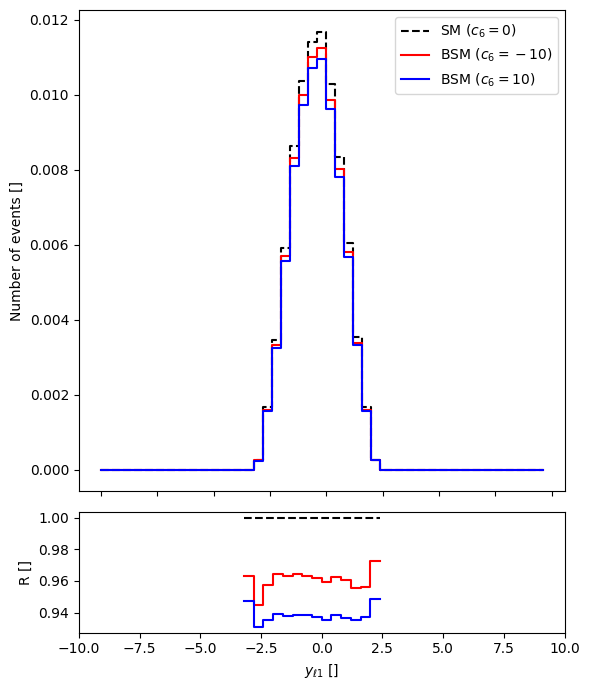

In [98]:
BINS=50

hist_sm, bins = np.histogram(l1_by_pt.rapidity, bins=BINS, range=(-10,10), weights=sample[msq.Component.SIG].weights)
hist_c6_1, bins = np.histogram(l1_by_pt.rapidity, bins=BINS, range=(-10,10), weights=weights_c6.T[0])
hist_c6_2, bins = np.histogram(l1_by_pt.rapidity, bins=BINS, range=(-10,10), weights=weights_c6.T[1])

fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [4, 1]}, figsize=(6,7))

ax1.set_xticklabels([])

ax1.step(bins[:-1], hist_sm, color='k', linestyle='--', label=u'SM ($c_6=0$)')
ax1.step(bins[:-1], hist_c6_1, color='r', label=u'BSM ($c_6=-10$)')
ax1.step(bins[:-1], hist_c6_2, color='b', label=u'BSM ($c_6=10$)')

ax1.set_ylabel('Number of events []')
#ax1.set_yscale('log')
ax1.legend()

ax2.step(bins[:-1], hist_sm/hist_sm, color='k', linestyle='--', label=u'SM ($c_6=0$)')
ax2.step(bins[:-1], hist_c6_1/hist_sm, color='r', label=u'BSM ($c_6=-10$)')
ax2.step(bins[:-1], hist_c6_2/hist_sm, color='b', label=u'BSM ($c_6=10$)')

ax2.set_xlabel(u'$y_{\ell 1}$ []')
ax2.set_ylabel('R []')
ax2.set_xbound(-10,10)

fig.tight_layout()

plt.show()

/tmp/ipykernel_25370/3073111780.py:19: RuntimeWarning: invalid value encountered in divide
  ax2.step(bins[:-1], hist_sm/hist_sm, color='k', linestyle='--', label=u'SM ($c_6=0$)')
/tmp/ipykernel_25370/3073111780.py:20: RuntimeWarning: invalid value encountered in divide
  ax2.step(bins[:-1], hist_c6_1/hist_sm, color='r', label=u'BSM ($c_6=-10$)')
/tmp/ipykernel_25370/3073111780.py:21: RuntimeWarning: invalid value encountered in divide
  ax2.step(bins[:-1], hist_c6_2/hist_sm, color='b', label=u'BSM ($c_6=10$)')


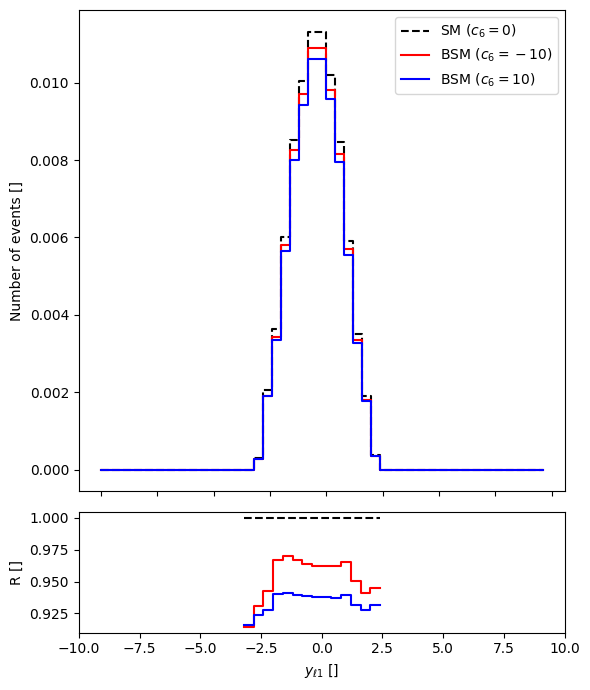

In [99]:
BINS=50

hist_sm, bins = np.histogram(l2_by_pt.rapidity, bins=BINS, range=(-10,10), weights=sample[msq.Component.SIG].weights)
hist_c6_1, bins = np.histogram(l2_by_pt.rapidity, bins=BINS, range=(-10,10), weights=weights_c6.T[0])
hist_c6_2, bins = np.histogram(l2_by_pt.rapidity, bins=BINS, range=(-10,10), weights=weights_c6.T[1])

fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [4, 1]}, figsize=(6,7))

ax1.set_xticklabels([])

ax1.step(bins[:-1], hist_sm, color='k', linestyle='--', label=u'SM ($c_6=0$)')
ax1.step(bins[:-1], hist_c6_1, color='r', label=u'BSM ($c_6=-10$)')
ax1.step(bins[:-1], hist_c6_2, color='b', label=u'BSM ($c_6=10$)')

ax1.set_ylabel('Number of events []')
#ax1.set_yscale('log')
ax1.legend()

ax2.step(bins[:-1], hist_sm/hist_sm, color='k', linestyle='--', label=u'SM ($c_6=0$)')
ax2.step(bins[:-1], hist_c6_1/hist_sm, color='r', label=u'BSM ($c_6=-10$)')
ax2.step(bins[:-1], hist_c6_2/hist_sm, color='b', label=u'BSM ($c_6=10$)')

ax2.set_xlabel(u'$y_{\ell 1}$ []')
ax2.set_ylabel('R []')
ax2.set_xbound(-10,10)

fig.tight_layout()

plt.show()

/tmp/ipykernel_25370/2735906956.py:19: RuntimeWarning: invalid value encountered in divide
  ax2.step(bins[:-1], hist_sm/hist_sm, color='k', linestyle='--', label=u'SM ($c_6=0$)')
/tmp/ipykernel_25370/2735906956.py:20: RuntimeWarning: invalid value encountered in divide
  ax2.step(bins[:-1], hist_c6_1/hist_sm, color='r', label=u'BSM ($c_6=-10$)')
/tmp/ipykernel_25370/2735906956.py:21: RuntimeWarning: invalid value encountered in divide
  ax2.step(bins[:-1], hist_c6_2/hist_sm, color='b', label=u'BSM ($c_6=10$)')


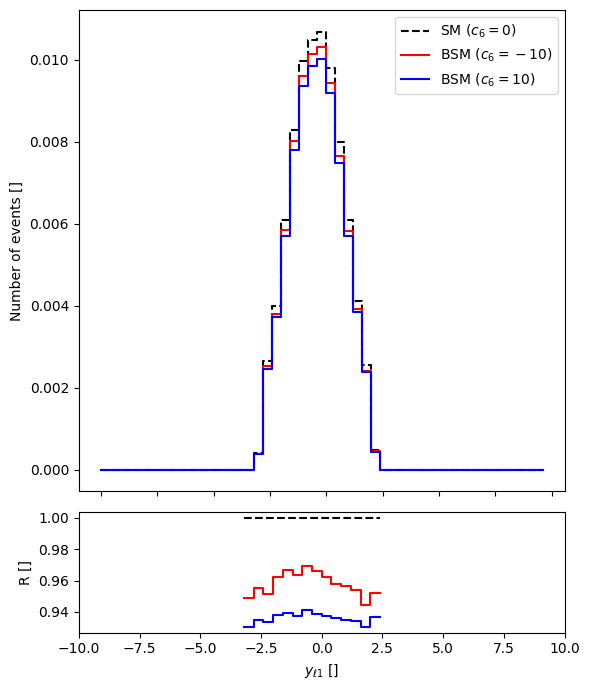

In [100]:
BINS=50

hist_sm, bins = np.histogram(l3_by_pt.rapidity, bins=BINS, range=(-10,10), weights=sample[msq.Component.SIG].weights)
hist_c6_1, bins = np.histogram(l3_by_pt.rapidity, bins=BINS, range=(-10,10), weights=weights_c6.T[0])
hist_c6_2, bins = np.histogram(l3_by_pt.rapidity, bins=BINS, range=(-10,10), weights=weights_c6.T[1])

fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [4, 1]}, figsize=(6,7))

ax1.set_xticklabels([])

ax1.step(bins[:-1], hist_sm, color='k', linestyle='--', label=u'SM ($c_6=0$)')
ax1.step(bins[:-1], hist_c6_1, color='r', label=u'BSM ($c_6=-10$)')
ax1.step(bins[:-1], hist_c6_2, color='b', label=u'BSM ($c_6=10$)')

ax1.set_ylabel('Number of events []')
#ax1.set_yscale('log')
ax1.legend()

ax2.step(bins[:-1], hist_sm/hist_sm, color='k', linestyle='--', label=u'SM ($c_6=0$)')
ax2.step(bins[:-1], hist_c6_1/hist_sm, color='r', label=u'BSM ($c_6=-10$)')
ax2.step(bins[:-1], hist_c6_2/hist_sm, color='b', label=u'BSM ($c_6=10$)')

ax2.set_xlabel(u'$y_{\ell 1}$ []')
ax2.set_ylabel('R []')
ax2.set_xbound(-10,10)

fig.tight_layout()

plt.show()

/tmp/ipykernel_25370/2869923921.py:19: RuntimeWarning: invalid value encountered in divide
  ax2.step(bins[:-1], hist_sm/hist_sm, color='k', linestyle='--', label=u'SM ($c_6=0$)')
/tmp/ipykernel_25370/2869923921.py:20: RuntimeWarning: invalid value encountered in divide
  ax2.step(bins[:-1], hist_c6_1/hist_sm, color='r', label=u'BSM ($c_6=-10$)')
/tmp/ipykernel_25370/2869923921.py:21: RuntimeWarning: invalid value encountered in divide
  ax2.step(bins[:-1], hist_c6_2/hist_sm, color='b', label=u'BSM ($c_6=10$)')


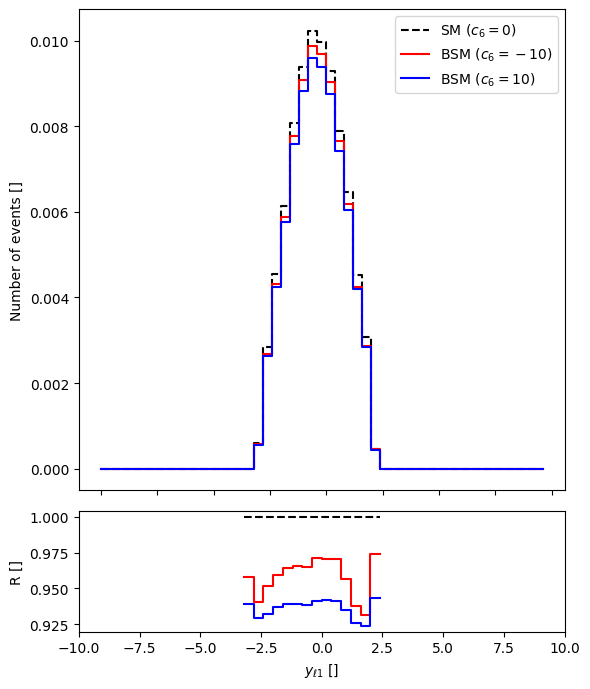

In [101]:
BINS=50

hist_sm, bins = np.histogram(l4_by_pt.rapidity, bins=BINS, range=(-10,10), weights=sample[msq.Component.SIG].weights)
hist_c6_1, bins = np.histogram(l4_by_pt.rapidity, bins=BINS, range=(-10,10), weights=weights_c6.T[0])
hist_c6_2, bins = np.histogram(l4_by_pt.rapidity, bins=BINS, range=(-10,10), weights=weights_c6.T[1])

fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [4, 1]}, figsize=(6,7))

ax1.set_xticklabels([])

ax1.step(bins[:-1], hist_sm, color='k', linestyle='--', label=u'SM ($c_6=0$)')
ax1.step(bins[:-1], hist_c6_1, color='r', label=u'BSM ($c_6=-10$)')
ax1.step(bins[:-1], hist_c6_2, color='b', label=u'BSM ($c_6=10$)')

ax1.set_ylabel('Number of events []')
#ax1.set_yscale('log')
ax1.legend()

ax2.step(bins[:-1], hist_sm/hist_sm, color='k', linestyle='--', label=u'SM ($c_6=0$)')
ax2.step(bins[:-1], hist_c6_1/hist_sm, color='r', label=u'BSM ($c_6=-10$)')
ax2.step(bins[:-1], hist_c6_2/hist_sm, color='b', label=u'BSM ($c_6=10$)')

ax2.set_xlabel(u'$y_{\ell 1}$ []')
ax2.set_ylabel('R []')
ax2.set_xbound(-10,10)

fig.tight_layout()

plt.show()